# Initialisation

In [1]:
# Importing necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics         import accuracy_score
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.svm             import SVC
from sklearn.tree            import DecisionTreeClassifier, plot_tree, export_graphviz
from IPython.display import Markdown
from matplotlib      import pyplot as plt
import pandas as pd
import numpy  as np
import os
plt.style.use('style.mplstyle')
plt.tight_layout(pad=0.05)
os.makedirs('assets', exist_ok=True)

# Defining constants
DATASET_FP    = 'https://raw.githubusercontent.com/msr8/classification-project/main/breast-cancer-wisconsin.csv'
ATTRS         = ['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion',
                  'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']
LABEL         = 'Class'
KS            = [1,101] # First element is included, second is not
KERNELS       = ['linear', 'poly', 'rbf', 'sigmoid']
DT_CRITERIONS = ['gini', 'entropy', 'log_loss']
TEST_SIZE     = 0.2
ROUND_FACTOR  = 3
RAND_STATE    = 42

# Loading dataset
data = pd.read_csv(DATASET_FP)
# Print info about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    object
dtypes: int64(9), object(2)
memory usage: 60.2+ KB
None


<Figure size 640x480 with 0 Axes>

<br>

# Preprocessing

In [2]:
# The missing values are represented with '?', replacing them with NA
data.replace('?', pd.NA, inplace=True)
# Since there are only 16 rows in the dataset with missing values, we can drop them
data.dropna(inplace=True)

# In the class column, replacing 'benign' with 0 and 'malignant' with 1
data['Class'].replace('benign',    0, inplace=True)
data['Class'].replace('malignant', 1, inplace=True)
# Since all values in the dataframe can be represented as integers, converting them
data = data.astype(int)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   id                           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB
None


<br>

# Splitting data

In [3]:
# Splitting data into x and y
x = data[ATTRS]
y = data[LABEL]
# Splitting data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE, random_state=RAND_STATE)

<br>

# KNN

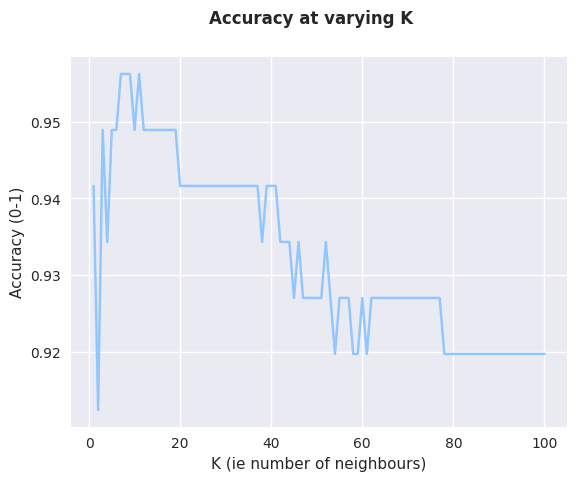

Lowest accuracy:  0.9124087591240876
Highest accuracy: 0.9562043795620438


In [4]:
accuracies = {}

for k in range(*KS):
    # Creating a KNN classifier
    knn_model = KNeighborsClassifier(n_neighbors=k)
    # Training the classifier
    knn_model.fit(x_train, y_train)
    # Making predictions
    y_pred = knn_model.predict(x_test)
    # Calculating accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Storing it in our dict
    accuracies[k] = accuracy

# Plotting our findings and displaying them
plt.suptitle('Accuracy at varying K')
plt.xlabel('K (ie number of neighbours)')
plt.ylabel('Accuracy (0-1)')
plt.plot(accuracies.keys(), accuracies.values())
plt.savefig('assets/knn.png')
plt.show()
# Displaying lowest and highest accuracy
print(f'Lowest accuracy:  {min(accuracies.values())}\nHighest accuracy: {max(accuracies.values())}')

As we can see, our accuracy usually remains above 0.9, and doesn't fluctuate much in higher values of `k`

<br>

# SVM

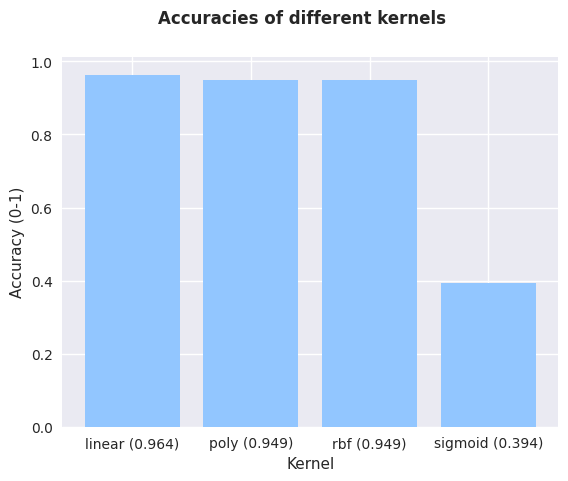

In [5]:
accuracies = {}

for kernel in KERNELS:
    # Creating a SVM classifier
    svm_model = SVC(kernel=kernel)
    # Training the classifier
    svm_model.fit(x_train, y_train)
    # Making predictions
    y_pred = svm_model.predict(x_test)
    # Calculating accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Storing it in our dict
    accuracies[kernel] = accuracy

# Plotting our findings and displaying them
plt.suptitle('Accuracies of different kernels')
# plt.title?
plt.xlabel('Kernel')
plt.ylabel('Accuracy (0-1)')
x_vals = [f'{i} ({round(accuracies[i],ROUND_FACTOR)})' for i in accuracies.keys()]
plt.bar(x_vals, accuracies.values())
plt.savefig('assets/svm.png')
plt.show()

As we can see, our accuracy is very high using linear, poly, or rbf kernels, but worse than random when using the sigmoid kernel

<br>

# Decision Tree

In [ ]:
plt.style.use('style.mplstyle')
accuracies = {}

fig, axs = plt.subplots(3)
for i,criterion in enumerate(DT_CRITERIONS):
    # Creating a Decision Tree classifier
    dt_model = DecisionTreeClassifier(criterion=criterion, random_state=RAND_STATE)
    # Training the classifier
    dt_model.fit(x_train, y_train)
    # Making predictions
    y_pred = dt_model.predict(x_test)
    # Calculating accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Storing it in our dict
    accuracies[criterion] = accuracy
    # Displaying the decision tree
    plot_tree(dt_model, feature_names=ATTRS, class_names=['benign','malignant'], filled=True, ax=axs[i])
    axs[i].set_title(criterion.capitalize())
plt.savefig(f'assets/dtree-representations.png') #bbox_inches to remove big right and left margin
plt.show()

# Plotting our findings and displaying them
plt.suptitle('Accuracies of different criterions')
plt.xlabel('Criterion')
plt.ylabel('Accuracy (0-1)')
x_vals = [f'{i} ({round(accuracies[i],ROUND_FACTOR)})' for i in accuracies.keys()]
plt.bar(x_vals, accuracies.values())
plt.savefig('assets/dtree.png')
plt.show()

<br>